In [21]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import tree 

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error

import pickle

## Data investigation

In [138]:
df = pd.read_csv("data/concrete.csv")
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [23]:
df.info()
# Good type, dont need to convert 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [142]:
# Rename columns

df.columns

new_names = ["cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", "coarse", "fine","age", "CCS"]

df.columns = new_names

df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [25]:
df.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age,CCS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Correlations

In [145]:
df.corr(numeric_only=True)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age,CCS
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast_furnace_slag,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
fly_ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
CCS,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


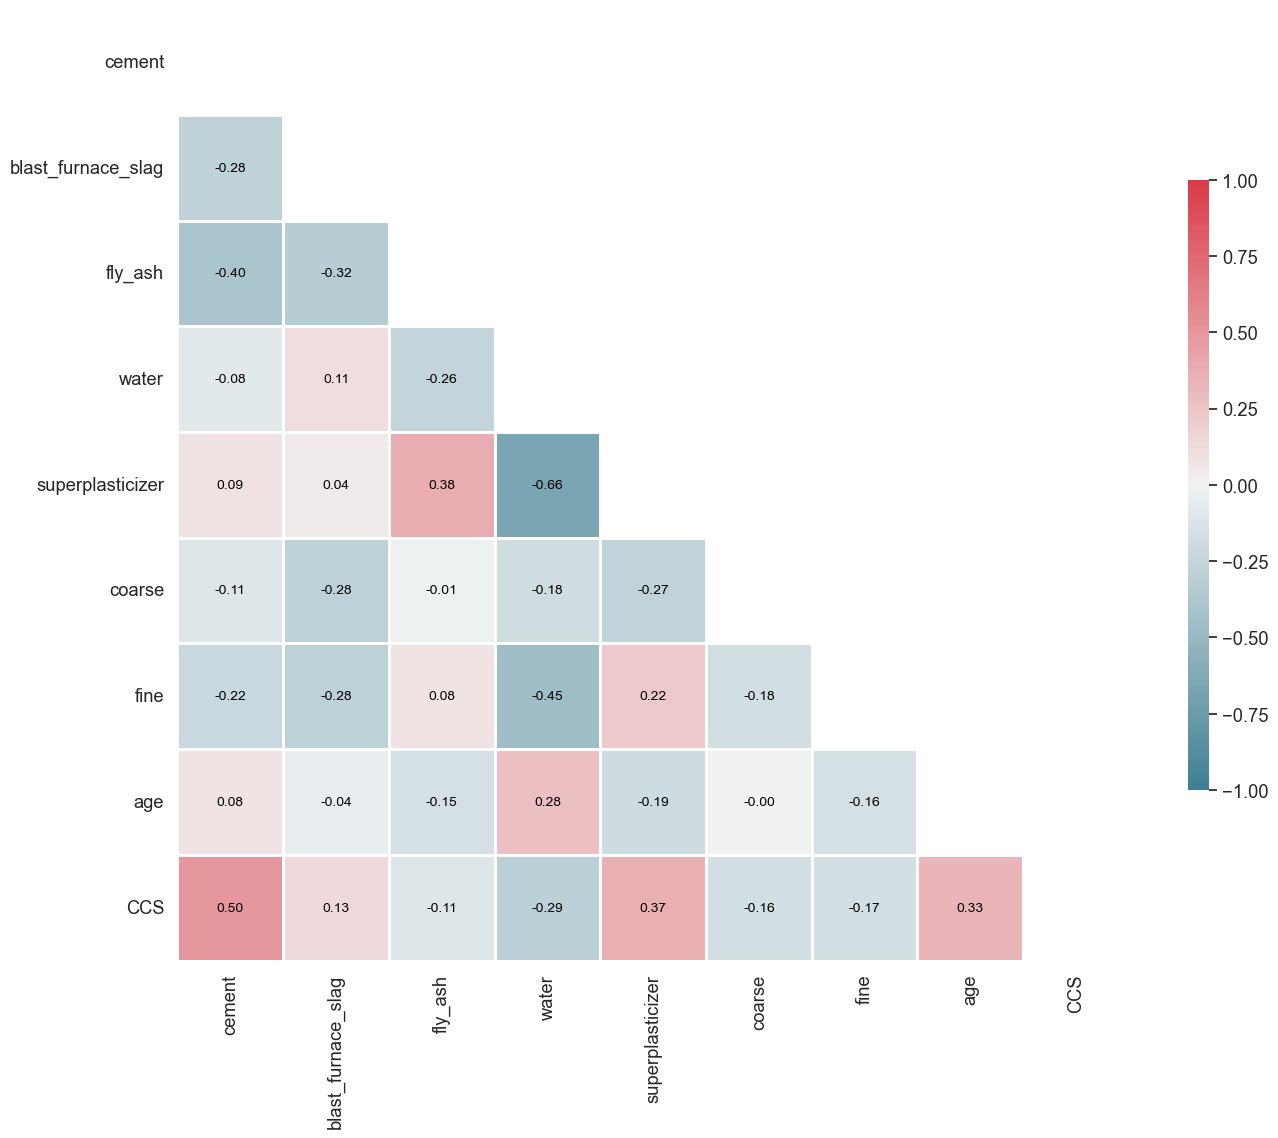

In [ ]:
# Corr heatmap

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)

sns.set_theme(style="white", font_scale=1.2)

mask = np.triu(np.ones_like(correlation, dtype=bool))

# Figure
plt.figure(figsize=(14, 12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Heatmap
sns.heatmap(correlation, 
            mask=mask, 
            cmap=cmap, 
            vmin=-1, vmax=1, center=0,
            square=True, 
            linewidths=.8, 
            cbar_kws={"shrink": .6, "aspect": 30}, 
            annot=True, 
            fmt=".2f", 
            annot_kws={"size":10, "color":"black"})


plt.tight_layout()
plt.show()

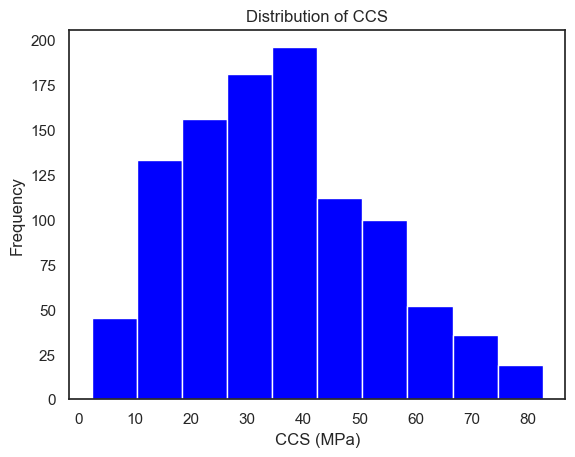

In [29]:
#hist Y
fig, ax = plt.subplots()
ax.hist(df["CCS"], color="blue")
ax.set_xlabel("CCS (MPa)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of CCS")
plt.show()

## Data preparation for ML

### Outliers

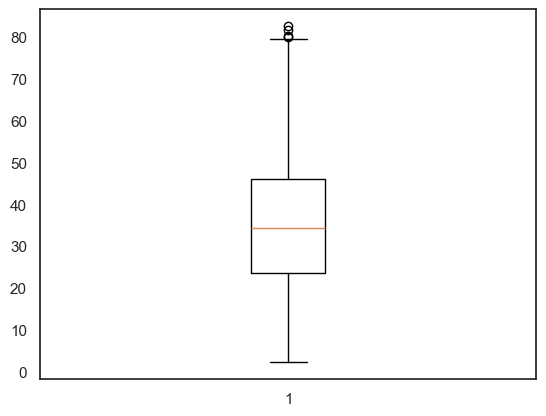

In [31]:
plt.boxplot(df["CCS"]);

In [32]:
cols = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
        'coarse', 'fine', 'age', 'CCS']

z_scores = (df[cols] - df[cols].mean()) / df[cols].std()

# Identifier les outliers (|z| > 3)
outliers = (abs(z_scores) > 3)

outliers_list = []

for col in cols:
    # Indices où il y a un outlier
    indices = df.index[outliers[col]]
    # Valeurs correspondantes
    values = df.loc[indices, col].values
    # Ajouter à la liste
    for i, val in zip(indices, values):
        outliers_list.append({'ligne': i, 'colonne': col, 'valeur': val})

# Convertir en DataFrame pour mieux visualiser
outliers_df = pd.DataFrame(outliers_list)
outliers_df

,ligne,colonne,valeur
0,553,blast_furnace_slag,359.4
1,559,blast_furnace_slag,359.4
2,571,blast_furnace_slag,342.1
3,584,blast_furnace_slag,342.1
4,873,water,247.0
5,936,water,246.9
6,76,superplasticizer,32.2
7,79,superplasticizer,28.2
8,99,superplasticizer,32.2
9,102,superplasticizer,28.2


In [33]:
z_scores.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age,CCS
count,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,-9.657862e-17,-6.898473e-17,3.311267e-16,-8.278168e-17,2.345481e-16,-1.793603e-16,7.588320e-17,3.311267e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.714386e+00,-8.564702e-01,-8.467207e-01,-2.800973e+00,-1.038440e+00,-2.211063e+00,-2.239824e+00,-7.070160e-01,-2.004470e+00
25%,-8.496130e-01,-8.564702e-01,-8.467207e-01,-7.804222e-01,-1.038440e+00,-5.262583e-01,-5.316951e-01,-6.120340e-01,-7.249463e-01
50%,-7.909154e-02,-6.014838e-01,-8.467207e-01,1.607843e-01,2.459003e-02,-6.325853e-02,7.397674e-02,-2.795973e-01,-8.231107e-02
75%,6.586571e-01,8.003620e-01,1.001350e+00,4.885677e-01,6.624079e-01,7.264133e-01,6.288849e-01,1.636517e-01,6.176613e-01
max,2.476715e+00,3.309081e+00,2.280014e+00,3.064009e+00,4.352042e+00,2.213157e+00,2.731774e+00,5.055221e+00,2.800328e+00


### NAs

In [139]:
df.isna().sum()
# 0 NAs

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### train-test split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df.drop("CCS", axis = 1)
Y = df["CCS"]

X.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse', 'fine', 'age'],
      dtype='object')

In [36]:
# Divide the dataset 70% train and 30% (Test + val)

X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, random_state=123, test_size=0.3)

# We do it twice bcs we divide val_test into 15% val and 15% test

X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, random_state=123, test_size=0.5)


In [37]:
print(df.shape)

print(X_train.shape)
print(Y_train.shape)

print(X_val.shape)
print(Y_val.shape)

print(X_test.shape)
print(Y_test.shape)


(1030, 9)
(721, 8)
(721,)
(154, 8)
(154,)
(155, 8)
(155,)


### Scaling data

Standardization

In [38]:
from sklearn.preprocessing import StandardScaler


In [39]:
numerical_columns = ['cement',
 'blast_furnace_slag',
 'fly_ash',
 'water',
 'superplasticizer',
 'coarse',
 'fine',
 'age']

In [40]:

scaler = StandardScaler()

#Fit only on train set 

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform  val et test

X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



In [41]:
#Save the scaler 

import pickle

scalerfile = "Models/scaler.sav"
with open(scalerfile, "wb") as f:
    pickle.dump({'columns' : numerical_columns, 'scaler' :scaler}, f)

In [42]:
# Distribution of scaled data

# We have to create a df 
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

X_train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,721.0,1.626069e-16,1.000694,-1.722148,-0.871430,-0.061867,0.704911,2.479638
blast_furnace_slag,721.0,8.376717e-17,1.000694,-0.856854,-0.856854,-0.584130,0.768130,3.227198
fly_ash,721.0,4.927481e-18,1.000694,-0.847340,-0.847340,-0.847340,1.007891,2.291510
water,721.0,-3.597061e-16,1.000694,-2.826329,-0.798246,0.146470,0.475475,3.060518
superplasticizer,721.0,-9.362214e-17,1.000694,-1.034365,-1.034365,0.025702,0.696799,4.341092
coarse,721.0,8.179618e-16,1.000694,-2.206746,-0.520715,-0.065100,0.740591,2.082981
fine,721.0,-8.475267e-16,1.000694,-2.258825,-0.599962,0.083698,0.618404,2.815793
age,721.0,-3.572424e-17,1.000694,-0.709397,-0.613008,-0.275644,0.174174,5.138239


# ML models

## Fit model

### Linear regression

In [43]:
from sklearn.linear_model import LinearRegression # importing machine learning model we'll use

lin_reg_model = LinearRegression() # initialize your model 
lin_reg_model = lin_reg_model.fit(X_train, Y_train) # fit the model with the training data

In [44]:
print("Intercept is:", lin_reg_model.intercept_)
print("\nCoefficients are:\n", lin_reg_model.coef_)

Intercept is: 35.93345634752935

Coefficients are:
 [12.38476958  8.65089873  5.10306716 -2.65741824  2.64768415  1.55425211
  1.84946883  7.33087375]


In [45]:
print(f"Our linear regression model:  \n \ny = {lin_reg_model.intercept_:.2f}"
      f"+ {lin_reg_model.coef_[0]:.2f}*{cols[0]} "
      f"+ {lin_reg_model.coef_[1]:.2f}*{cols[1]} "
      f"+ {lin_reg_model.coef_[2]:.2f}*{cols[2]} "
      f"+ {lin_reg_model.coef_[3]:.2f}*{cols[3]} "
      f"+ {lin_reg_model.coef_[4]:.2f}*{cols[4]} "
      f"+ {lin_reg_model.coef_[5]:.2f}*{cols[5]} "
      f"+ {lin_reg_model.coef_[6]:.2f}*{cols[6]} "
      f"+ {lin_reg_model.coef_[7]:.2f}*{cols[7]} "
     )

Our linear regression model:  
 
y = 35.93+ 12.38*cement + 8.65*blast_furnace_slag + 5.10*fly_ash + -2.66*water + 2.65*superplasticizer + 1.55*coarse + 1.85*fine + 7.33*age 


### KNN

In [46]:
from sklearn.neighbors import KNeighborsRegressor # we are importing machine learning model we'll use

knn_model = KNeighborsRegressor() 
knn_model.fit(X_train, Y_train) 

knn_model.n_neighbors # Number of NN (default = 5)

5

### Decision Tree

In [47]:
from sklearn.tree import DecisionTreeRegressor # importing machine learning model we'll use

dec_tree = DecisionTreeRegressor(random_state=123) # Initializing the model

dec_tree_model = dec_tree.fit(X_train, Y_train) # fit the model with the training data


In [48]:
dec_tree_model.tree_.max_depth 

19

In [49]:
# Smaller tree

dec_tree_model_small = DecisionTreeRegressor(random_state = 123, max_depth = 3) # Initializing the model
dec_tree_model_small = dec_tree_model_small.fit(X_train, Y_train) # fit the model with the training data

text_representation = tree.export_text(dec_tree_model_small, feature_names=numerical_columns)
print(text_representation)


|--- age <= -0.39
|   |--- cement <= 0.70
|   |   |--- age <= -0.56
|   |   |   |--- value: [15.85]
|   |   |--- age >  -0.56
|   |   |   |--- value: [28.66]
|   |--- cement >  0.70
|   |   |--- blast_furnace_slag <= -0.05
|   |   |   |--- value: [30.55]
|   |   |--- blast_furnace_slag >  -0.05
|   |   |   |--- value: [43.80]
|--- age >  -0.39
|   |--- cement <= 0.71
|   |   |--- cement <= -1.12
|   |   |   |--- value: [26.31]
|   |   |--- cement >  -1.12
|   |   |   |--- value: [39.67]
|   |--- cement >  0.71
|   |   |--- water <= 0.05
|   |   |   |--- value: [64.04]
|   |   |--- water >  0.05
|   |   |   |--- value: [47.96]



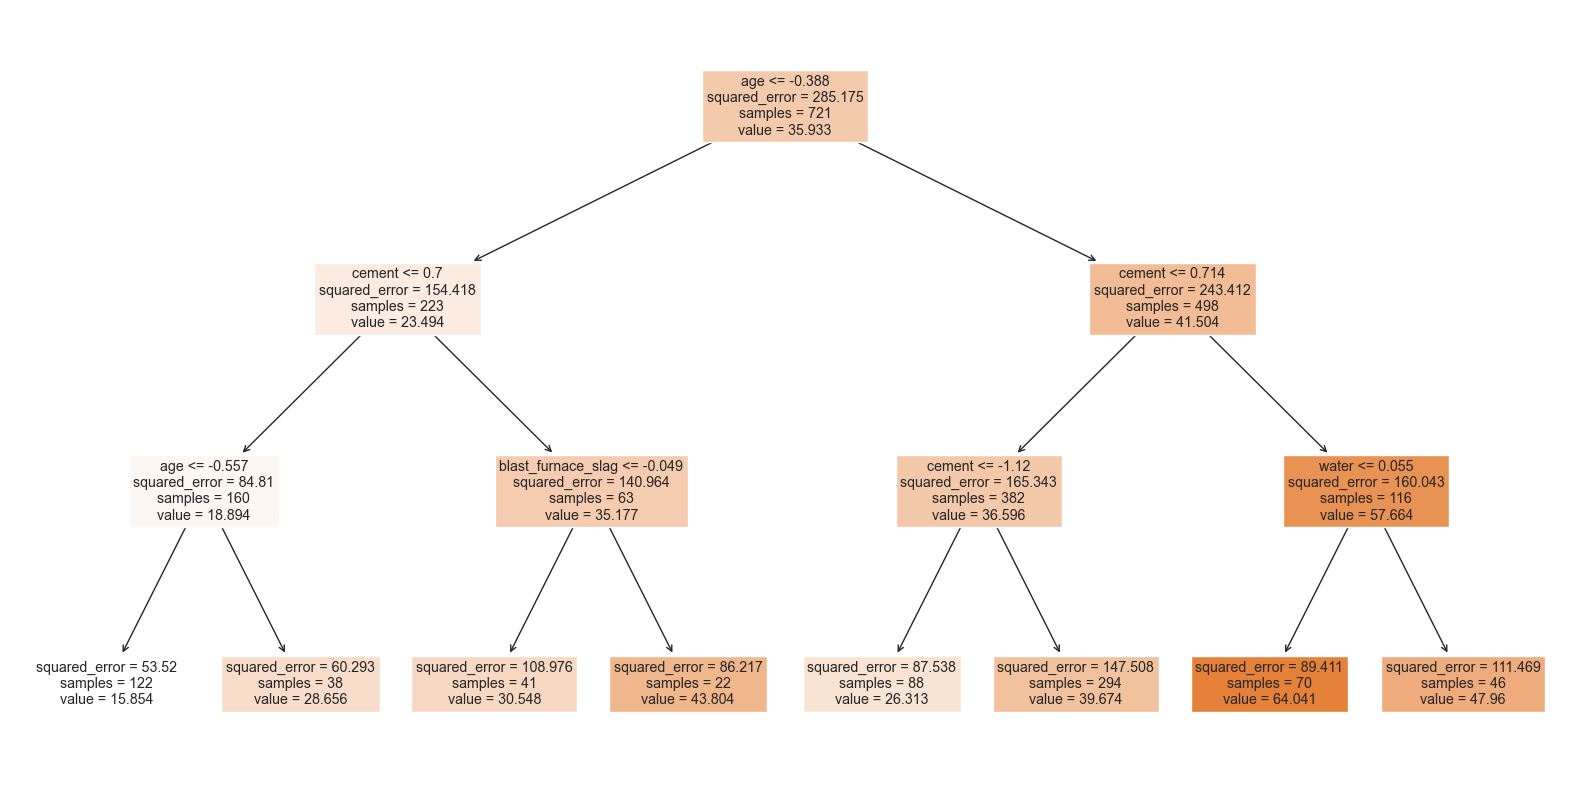

In [50]:
fig = plt.figure(figsize=(20,10))

dec_tree = tree.plot_tree(dec_tree_model_small, feature_names=cols, filled=True)

### Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor # importing machine learning model we'll use

rand_for_model = RandomForestRegressor(random_state=123) # Initializing the model
                                                     # setting random state so we can reproduce results

rand_for_model.fit(X_train, Y_train) # fit the model with the training data

print(rand_for_model.n_estimators )

100


In [53]:
# This gives you the first tree 
r = tree.export_text(rand_for_model.estimators_[0], feature_names=numerical_columns) # just change the index of an estimator 

print(r)

|--- age <= -0.39
|   |--- cement <= 0.70
|   |   |--- superplasticizer <= 0.25
|   |   |   |--- age <= -0.56
|   |   |   |   |--- fine <= -0.54
|   |   |   |   |   |--- age <= -0.65
|   |   |   |   |   |   |--- blast_furnace_slag <= 1.72
|   |   |   |   |   |   |   |--- blast_furnace_slag <= 1.39
|   |   |   |   |   |   |   |   |--- value: [16.11]
|   |   |   |   |   |   |   |--- blast_furnace_slag >  1.39
|   |   |   |   |   |   |   |   |--- value: [14.14]
|   |   |   |   |   |   |--- blast_furnace_slag >  1.72
|   |   |   |   |   |   |   |--- coarse <= -0.04
|   |   |   |   |   |   |   |   |--- value: [9.56]
|   |   |   |   |   |   |   |--- coarse >  -0.04
|   |   |   |   |   |   |   |   |--- value: [6.90]
|   |   |   |   |   |--- age >  -0.65
|   |   |   |   |   |   |--- cement <= 0.16
|   |   |   |   |   |   |   |--- cement <= -0.90
|   |   |   |   |   |   |   |   |--- value: [12.37]
|   |   |   |   |   |   |   |--- cement >  -0.90
|   |   |   |   |   |   |   |   |--- blast_furnac

In [54]:
for i in range(10):
    print(rand_for_model.estimators_[i].tree_.max_depth)

17
17
17
18
18
25
20
19
18
16


### Gradient Boosting Trees

In [55]:
from sklearn.ensemble import GradientBoostingRegressor # importing machine learning model we'll use

grad_boost_model = GradientBoostingRegressor(random_state=123) # Initializing the model
                                                                 # setting random state so we can reproduce results

grad_boost_model.fit(X_train, Y_train) # fit the model with the training data

grad_boost_model.n_estimators

100

### XGBoost

In [56]:
from xgboost import XGBRegressor # importing machine learning model we'll use

xgb_model = XGBRegressor(random_state=123, n_estimators=100) # Initializing the model
                                             # setting random state so we can reproduce results
    
xgb_model.fit(X_train.values, Y_train) # fit the model with the training data

print(xgb_model.n_estimators)


100


## Model evaluation

In [57]:
#Pred on X_val

predictions_lr = lin_reg_model.predict(X_val)
predictions_knn = knn_model.predict(X_val)
predictions_dt = dec_tree_model.predict(X_val)
predictions_rf = rand_for_model.predict(X_val)
predictions_gbm = grad_boost_model.predict(X_val)
predictions_xgb = xgb_model.predict(X_val)

In [58]:
prediction_df = pd.DataFrame({'predictions_lr': predictions_lr,
                              'predictions_knn': predictions_knn,
                              'predictions_dt': predictions_dt,
                              'predictions_rf': predictions_rf,
                              'predictions_gbm': predictions_gbm,
                              'predictions_xgb': predictions_xgb,
                              'true_values': Y_val
                             })
prediction_df

,predictions_lr,predictions_knn,predictions_dt,predictions_rf,predictions_gbm,predictions_xgb,true_values
657,13.263615,11.672967,24.290929,23.386695,20.754469,19.884958,20.593959
252,30.204033,33.024521,39.644870,38.612173,36.519742,38.696636,38.327971
487,50.742908,46.962968,57.026560,55.181453,55.446882,55.662651,46.684420
196,26.349560,27.921020,37.266178,33.091580,28.405220,29.191242,25.724350
236,28.150016,37.435789,45.705364,40.417745,35.463725,40.944260,40.230925
...,...,...,...,...,...,...,...
266,30.411255,25.691255,31.640054,32.978533,33.075189,37.739536,38.500340
463,40.091099,52.070606,55.020185,51.448361,49.740205,56.176708,56.061294
852,31.255119,32.566374,29.654363,31.362981,32.887574,34.173138,42.637196
177,61.395014,78.096947,79.296635,79.361790,80.010045,79.211464,79.296635


### Compare pred values with Y val

In [59]:
# Then we create list with all the models
models = [('Linear Regression', LinearRegression), 
          ('K nearest neighbors', KNeighborsRegressor), 
          ('Decision Tree', DecisionTreeRegressor), 
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosting Tree', GradientBoostingRegressor),
          ('XGB Regressor', XGBRegressor),
         ]
models

[('Linear Regression', sklearn.linear_model._base.LinearRegression),
 ('K nearest neighbors', sklearn.neighbors._regression.KNeighborsRegressor),
 ('Decision Tree', sklearn.tree._classes.DecisionTreeRegressor),
 ('Random Forest', sklearn.ensemble._forest.RandomForestRegressor),
 ('Gradient Boosting Tree', sklearn.ensemble._gb.GradientBoostingRegressor),
 ('XGB Regressor', xgboost.sklearn.XGBRegressor)]

In [148]:
metrics = []

for name, model in models:
    ml_model = model().fit(X_train, Y_train)
    pred=ml_model.predict(X_val) # Pred on X_val
    metrics.append((name, r2_score(Y_val, pred), root_mean_squared_error(Y_val, pred), mean_absolute_error(Y_val, pred)))
    


metrics = pd.DataFrame(metrics, columns=['Model', 'R square', 'Root mean squared error', 'Mean absolute error'])

metrics



,Model,R square,Root mean squared error,Mean absolute error
0,Linear Regression,0.563423,10.625104,8.538887
1,K nearest neighbors,0.709515,8.666916,6.641972
2,Decision Tree,0.818229,6.855912,4.483579
3,Random Forest,0.910843,4.801533,3.639669
4,Gradient Boosting Tree,0.915936,4.662390,3.639137
5,XGB Regressor,0.915976,4.661273,3.092679


**Gradient boosting is the best model**,
Then we have : XGB and random forest

### Hyperparameter tuning

### Grid Search

**RF**

In [61]:
from sklearn.model_selection import GridSearchCV


In [62]:
rf = RandomForestRegressor(random_state=42)

param_grid_rf = param_grid_rf = {
    'n_estimators': [100, 200, 300],   
    'max_depth': [None, 5, 10, 20],    
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(
    rf, param_grid=param_grid_rf,
    cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1
)

grid_rf.fit(X_train, Y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF score:", -grid_rf.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best RF params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best RF score: 29.300317253139394


In [63]:
best_grid_rf = grid_rf.best_estimator_
best_grid_rf

RandomForestRegressor(max_depth=20, n_estimators=300, random_state=42)

In [64]:
# Compare the results between our first RF model and this model 

# first one  
rf_model1 = RandomForestRegressor(random_state=123)                               
rf_model1.fit(X_train, Y_train)
pred_rf_model_1 = rf_model1.predict(X_val)
r2_rf_model1 = r2_score(Y_val, pred_rf_model_1) 

# best one 
best_grid_rf.fit(X_train, Y_train) 
pred_rf_grid = best_grid_rf.predict(X_val)
r2_rf_grid = r2_score(Y_val, pred_rf_grid) 

print("R square for first model is", r2_rf_model1)
print("R square for second model is", r2_rf_grid) 

R square for first model is 0.911405969042114
R square for second model is 0.9105697239755827


First model is better 

**Gradiant boosting reg**

In [65]:
gb = GradientBoostingRegressor(random_state=42)

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_gb = GridSearchCV(
    gb, param_grid=param_grid_gb,
    cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1
)

grid_gb.fit(X_train, Y_train)
print("Best GB params:", grid_gb.best_params_)
print("Best GB score:", -grid_gb.best_score_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best GB params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best GB score: 21.275305542616895


In [66]:
best_grid_gb = grid_gb.best_estimator_
best_grid_gb

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42, subsample=0.8)

In [67]:
# Compare the results between our first GB model and this model 

# first one  
gb_model1 = GradientBoostingRegressor(random_state=123) 
gb_model1.fit(X_train, Y_train)
pred_gb_model_1 = gb_model1.predict(X_val)
r2_gb_model1 = r2_score(Y_val, pred_gb_model_1) 

# best one 
best_grid_gb.fit(X_train, Y_train) 
pred_gb_grid = best_grid_gb.predict(X_val)
r2_gb_grid = r2_score(Y_val, pred_gb_grid) 

print("R square for first model is", r2_gb_model1)
print("R square for second model is", r2_gb_grid) 

R square for first model is 0.9161258278766162
R square for second model is 0.9498768359685898


Second model is the best one

**XBG Reg**

In [68]:

xgb = XGBRegressor(random_state=42, objective='reg:squarederror')

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]  # fraction de features utilisées par arbre
}

grid_xgb = GridSearchCV(
    xgb, param_grid=param_grid_xgb,
    cv=5, scoring='neg_mean_squared_error',
    n_jobs=-1, verbose=1
)

grid_xgb.fit(X_train, Y_train)
print("Best XGB params:", grid_xgb.best_params_)
print("Best XGB score:", -grid_xgb.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best XGB params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best XGB score: 20.840246385151563


In [69]:
best_grid_xgb = grid_xgb.best_estimator_
best_grid_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [70]:
# Compare the results between first XGB model and Grid Search model

# Model 1
xgb_model1 = XGBRegressor(random_state=123, n_estimators=100) 
xgb_model1.fit(X_train.values, Y_train)
pred_xgb_model_1 = xgb_model1.predict(X_val)
r2_xgb_model1 = r2_score(Y_val, pred_xgb_model_1)
 
# best one 
best_grid_xgb.fit(X_train, Y_train) 
pred_xgb_grid = best_grid_xgb.predict(X_val)
r2_xgb_grid = r2_score(Y_val, pred_xgb_grid) 

print("R square for first model is", r2_xgb_model1)
print("R square for second model is", r2_xgb_grid) 

R square for first model is 0.9159759824484401
R square for second model is 0.945513586951982


Second model is the best one

### Best models metrics

In [ ]:

# Random forest
# Best is model 1

r2_rf_model1
RMSE_rf = root_mean_squared_error(Y_val, pred_rf_model_1)
MAE_rf = mean_absolute_error(Y_val, pred_rf_model_1)


# GB
# Best is grid

r2_gb_grid
RMSE_gb = root_mean_squared_error(Y_val, pred_gb_grid)
MAE_gb = mean_absolute_error(Y_val, pred_gb_grid)


# XGB 
# Best grid 
r2_xgb_grid
RMSE_xgb = root_mean_squared_error(Y_val, pred_xgb_grid)
MAE_xgb = mean_absolute_error(Y_val, pred_xgb_grid)

#DF
results_df = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost"],
    "R2": [r2_rf_model1, r2_gb_grid, r2_xgb_grid],
    "RMSE": [RMSE_rf, RMSE_gb, RMSE_xgb],
    "MAE": [MAE_rf, MAE_gb, MAE_xgb]
})

results_df

,Model,R2,RMSE,MAE
0,Random Forest,0.911406,4.786357,3.652565
1,Gradient Boosting,0.949877,3.600162,2.603277
2,XGBoost,0.945514,3.753591,2.731382


**Gradient boosting is the best model**, it has the highest R2, lowest RMSE and MAE

## Final evaluation on test data

In [126]:
# Combine train and val data

X_train_final = pd.concat([X_train, X_val])
y_train_final = pd.concat([Y_train, Y_val])

print(X_train_final.shape)
print(y_train_final.shape)

(875, 8)
(875,)


### GB 

In [127]:
# best gb model = best_grid_gb

gb_final_model = best_grid_gb
gb_model = gb_final_model.fit(X_train_final, y_train_final)

pred_gb_final = gb_model.predict(X_test)

In [128]:
prediction_gb_df = pd.DataFrame({'predictions_gb': pred_gb_final,
                              'true_values': Y_test
                             })
prediction_gb_df

,predictions_gb,true_values
369,16.019645,15.340841
841,31.205135,30.123206
927,31.011895,33.053479
1015,47.577624,52.426376
910,28.636715,26.144930
...,...,...
617,7.864572,9.307926
523,60.090740,62.935369
922,35.561378,33.798114
752,55.041474,59.763780


In [129]:
R2_gb_final = r2_score(Y_test, pred_gb_final)
RMSE_gb_final = root_mean_squared_error(Y_test, pred_gb_final)
MAE_gb_final = mean_absolute_error(Y_test, pred_gb_final)

print("R2:", R2_gb_final, "RMSE:", RMSE_gb_final, "MAE:",MAE_gb_final)

R2: 0.9136465381822819 RMSE: 4.814435261121953 MAE: 2.650013922207295


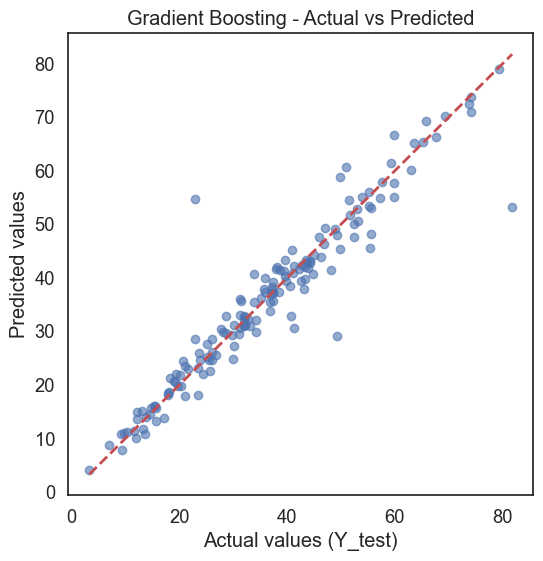

In [146]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, pred_gb_final, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # perfect line
plt.xlabel("Actual values (Y_test)")
plt.ylabel("Predicted values")
plt.title("Gradient Boosting - Actual vs Predicted")
plt.show()

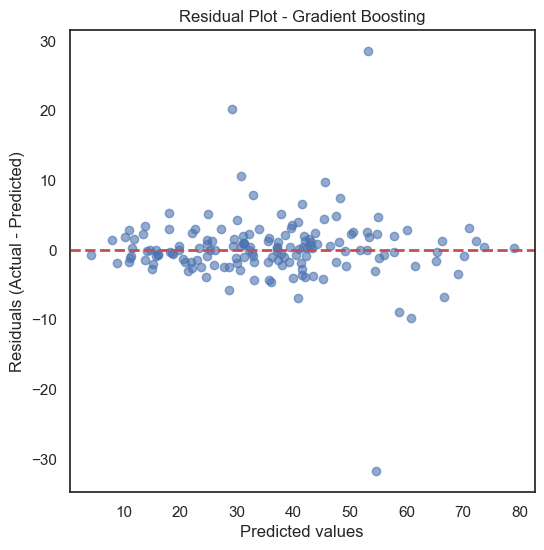

In [78]:
# Residuals
residuals = Y_test - pred_gb_final

# Plot residuals
plt.figure(figsize=(6,6))
plt.scatter(pred_gb_final, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)  # reference line
plt.xlabel("Predicted values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Gradient Boosting")
plt.show()

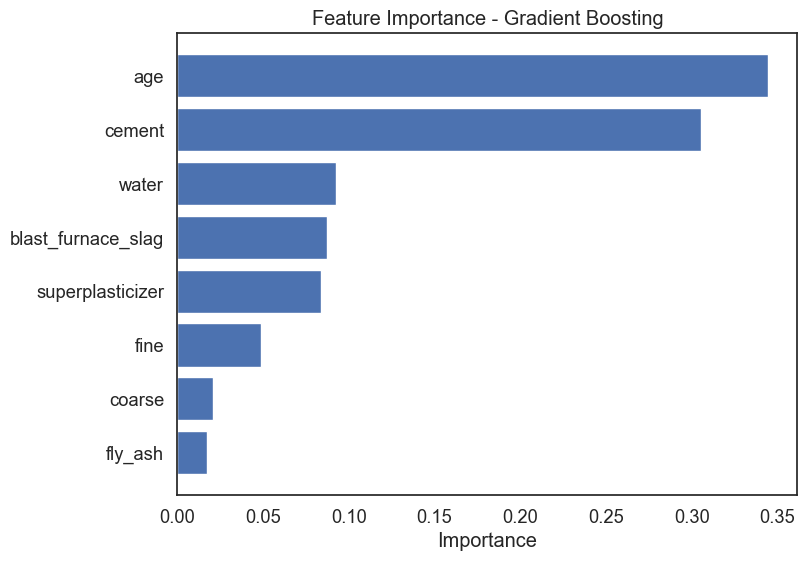

In [147]:
# Get feature importances
importances = gb_final_model.feature_importances_
features = X_train_final.columns  
indices = np.argsort(importances)[::-1] 

feat_imp_df = pd.DataFrame({
    "Feature": features[indices],
    "Importance": importances[indices]
})

# Plot
plt.figure(figsize=(8,6))
plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.gca().invert_yaxis()  # highest importance at the top
plt.xlabel("Importance")
plt.title("Feature Importance - Gradient Boosting")
plt.show()

### XGB

In [80]:
xgb_final_model = best_grid_xgb
xgb_model = xgb_final_model.fit(X_train_final, y_train_final)

pred_xgb_final = xgb_model.predict(X_test)

In [81]:
R2_xgb_final = r2_score(Y_test, pred_xgb_final)
RMSE_xgb_final = root_mean_squared_error(Y_test, pred_xgb_final)
MAE_xgb_final = mean_absolute_error(Y_test, pred_xgb_final)

print(R2_xgb_final, RMSE_xgb_final, MAE_xgb_final)

0.9118680676902329 4.863759823598612 2.5648759021650918


In [130]:
#Save model

import pickle

with open("Models/best_gb_model.sav", "wb") as f:
    pickle.dump(gb_model, f)

# Deploying the model

In [ ]:
#Import new data 

#For this example, we take the entire dataframe without the target variable (Y), treating it as new data to be predicted.

new_data= pd.read_csv("data/concrete.csv")

# Delete Y 
new_data = new_data.drop(new_data.columns[8], axis=1)
new_data.head()



,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [132]:
# Import the scaler

import pickle

with open("Models/scaler.sav", "rb") as f:
    scaler_data = pickle.load(f)
scaler_data

{'columns': ['cement',
  'blast_furnace_slag',
  'fly_ash',
  'water',
  'superplasticizer',
  'coarse',
  'fine',
  'age'],
 'scaler': StandardScaler()}

In [133]:
def preprocess_ccs(df):
    import pickle

    # Load scaler
    with open("Models/scaler.sav", "rb") as f:
        scaler_data = pickle.load(f)

    expected_columns = scaler_data['columns'] 
    scaler = scaler_data['scaler']

    df.columns = expected_columns

    # Scale
    df[expected_columns] = scaler.transform(df[expected_columns])

    return df

In [134]:
preprocess_ccs(new_data)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age
0,2.479638,-0.856854,-0.847340,-0.934548,-0.617016,0.869296,-1.214875,-0.275644
1,2.479638,-0.856854,-0.847340,-0.934548,-0.617016,1.062353,-1.214875,-0.275644
2,0.489066,0.762449,-0.847340,2.167503,-1.034365,-0.520715,-2.258825,3.612070
3,0.489066,0.762449,-0.847340,2.167503,-1.034365,-0.520715,-2.258825,5.138239
4,-0.795453,0.647677,-0.847340,0.475475,-1.034365,0.076475,0.688426,5.057915
...,...,...,...,...,...,...,...,...
1025,-0.049108,0.461315,0.569142,-0.107335,0.451398,-1.317397,-0.039794,-0.275644
1026,0.390257,-0.856854,0.966009,0.663478,0.701808,-1.989235,0.534379,-0.275644
1027,-1.276068,0.727222,0.856204,0.508376,-0.016033,-1.030386,0.109160,-0.275644
1028,-1.174381,1.264717,-0.847340,-0.295338,0.852053,0.220624,0.222467,-0.275644


In [135]:
# import the model


with open("Models/best_gb_model.sav", "rb") as f:
    loaded_gb_model = pickle.load(f)

loaded_gb_model

GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=300,
                          random_state=42, subsample=0.8)

In [136]:
#Apply the model to new data

estimated_CSS = loaded_gb_model.predict(new_data)

new_data["CSS"] = estimated_CSS

new_data.head()


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse,fine,age,CSS
0,2.479638,-0.856854,-0.84734,-0.934548,-0.617016,0.869296,-1.214875,-0.275644,77.491489
1,2.479638,-0.856854,-0.84734,-0.934548,-0.617016,1.062353,-1.214875,-0.275644,64.593693
2,0.489066,0.762449,-0.84734,2.167503,-1.034365,-0.520715,-2.258825,3.612070,40.225557
3,0.489066,0.762449,-0.84734,2.167503,-1.034365,-0.520715,-2.258825,5.138239,40.959271
4,-0.795453,0.647677,-0.84734,0.475475,-1.034365,0.076475,0.688426,5.057915,42.717744
